# Tutorial: Betti Numbers of Cell Complex

This notebook provides a step-by-step guide on using our implementation to calculate the Betti numbers of the examples discussed in our paper. 

Fist, we import the necessary packages.

In [1]:
from betti import CellComplex
import networkx as nx 
from itertools import combinations_with_replacement

## Example: 5-cycle

We compute the first Betti number of the cell complex arising from the 5-cycle by gluing 2-cells to all cycles of length at most five. The Betti number is equal to 0.

In [3]:
G = nx.cycle_graph(n=5)
CC = CellComplex(G=G)
print(CC)

CWComplex(num_vertices=5, num_edges=5, num_two_cells=1)


In [4]:
print('The first Betti number of the cell complex is', CC.betti_num())

The first Betti number of the cell complex is 0


## Example: 6-cycle

We compute the first Betti number of the cell complex arising from the 6-cycle by gluing 2-cells to all cycles of length at most five. The Betti number is equal to 1.

In [5]:
G = nx.cycle_graph(n=5)
CC = CellComplex(G=G)
print(CC)

CWComplex(num_vertices=5, num_edges=5, num_two_cells=1)


In [6]:
print('The first Betti number of the cell complex is', CC.betti_num())

The first Betti number of the cell complex is 0


## Example: Rope ladder graph

We compute the first Betti number of the cell complex arising from the rope ladder graph by gluing 2-cells to all cycles of length at most five. The rope ladder graph is obtained by gluing together n different 4-cycles. For $n \geq 3$, the first Betti number is equal to 1.

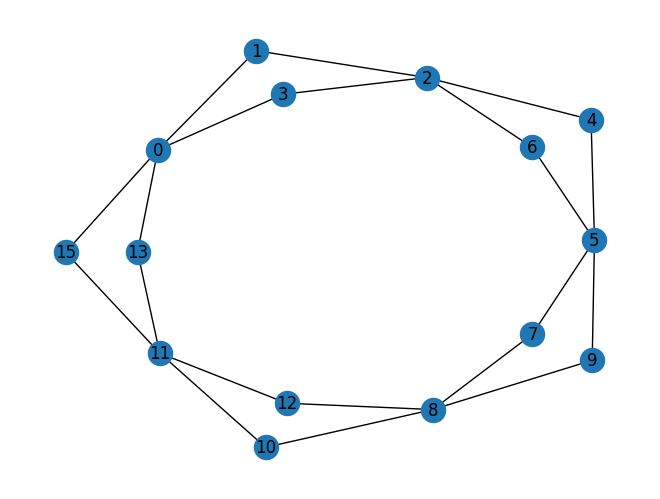

In [7]:
def rope_ladder_graph(n:int):
    G = nx.cycle_graph(4)
    for i in range(n-1): 
        # New 4-cycle
        base_vertex = 2 + 3*i
        cycle = [base_vertex, base_vertex+2,base_vertex+3,base_vertex+4,base_vertex]

        # Add 4-cycle to graph
        G.add_edges_from([(cycle[j], cycle[j + 1]) for j in range(4)])
    
    G = nx.contracted_nodes(G, 0,3*n-1)

    return G

nx.draw(rope_ladder_graph(5), with_labels=True)

In [8]:
CC = CellComplex(G=rope_ladder_graph(5))
print(CC)

CWComplex(num_vertices=15, num_edges=20, num_two_cells=5)


The 2-cells of the associated cell-complex are given by:

In [9]:
CC.X2

[[0, 1, 2, 3], [0, 13, 11, 14], [8, 10, 11, 12], [8, 7, 5, 9], [2, 4, 5, 6]]

In [10]:
print('The first Betti number of the cell complex is', CC.betti_num())

The first Betti number of the cell complex is 1


## Example: Zero-range Process

The zero-range process is a stochastic model of interacting particles. It describes the dynamics of particles
hopping between the vertices of a graph, with the hopping rates depending only on the number of particles
at the departure site. We discuss the case where the underlying graph is the cycle of length $l$ and we have a total number of 2 particles. 

In [21]:
def zero_range_graph(l: int, M=2):
    """
    Constructs the transition graph for the zero-range process on a cycle C_l with M particles.
    
    Nodes represent configurations (n0, ..., n_{l-1}) where sum(n_i) = M.
    Edges connect configurations that differ by moving one particle between adjacent vertices.
    
    Parameters:
        l (int): Length of the cycle (number of vertices).
        M (int): Total number of particles.
    
    Returns:
        (networkx.Graph): The transition graph.
    """
    G = nx.Graph()

    # Add nodes
    nodes = combinations_with_replacement(range(l), M)
    G.add_nodes_from([v for v in nodes])

    # Add edges
    for u in G.nodes():
        for v in G.nodes():
            if (u[0], u[1]) in {(min(v[0], (v[1] + 1) % l), max(v[0], (v[1] + 1) % l)), (min(v[0], (v[1] - 1) % l), max(v[0], (v[1] - 1) % l)), (min((v[0] + 1) %l, v[1]), max((v[0] + 1) % l,v[1])), (min((v[0] - 1) %l, v[1]), max((v[0] - 1) % l,v[1]))}:
                G.add_edge(u,v)

    return G


In [22]:
G = zero_range_graph(l=6)
CC = CellComplex(G=G)
print(CC)


CWComplex(num_vertices=21, num_edges=36, num_two_cells=15)


In [24]:
print('The first Betti number of the cell complex is', CC.betti_num())

The first Betti number of the cell complex is 1


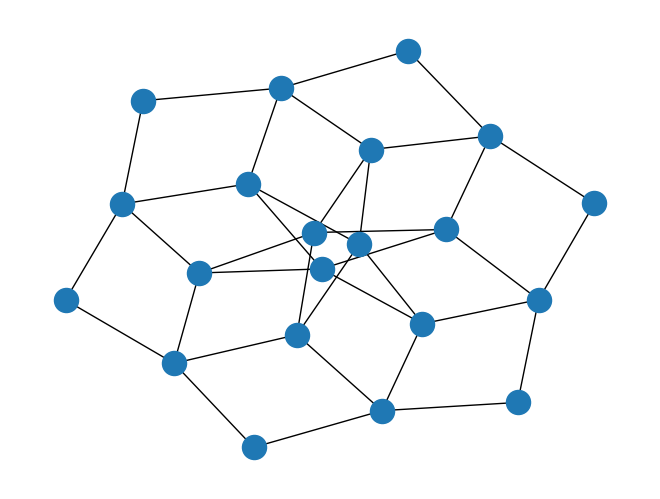

In [25]:
nx.draw(G)

## Example: Chess-board graph

The chess-board graph is a 6-regular graph obtained from the chess-board lattice by identifying the vertices $x,y \in \mathbb{Z}^2$ if and only if
$ x - y \in \Z \begin{pmatrix}
        4 \\
        4
        \end{pmatrix}
        + \Z \begin{pmatrix}
            4 \\
            -4
            \end{pmatrix}.
$ The associated cell complex has first Betti-number equal to 0.

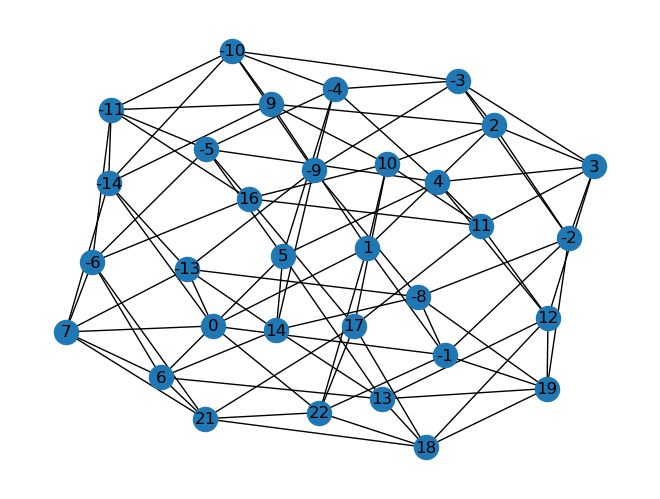

In [4]:
def chess_board_graph():
    """
    Constructs the chess-board graph

    Returns:
        (networkx.Graph): The chess-board graph
    """
    G = nx.Graph()

    # Lattice structure
    G.add_edges_from([(i,i+1) for i in range (8)])
    G.add_edges_from([(i,i+1) for i in range (9,15)])
    G.add_edges_from([(i,i+1) for i in range (16,20)])
    G.add_edges_from([(i,i+1) for i in range (21,23)])
    G.add_edges_from([(i,i-1) for i in range (-1,-7,-1)])
    G.add_edges_from([(i,i-1) for i in range (-8,-12,-1)])
    G.add_edges_from([(i,i-1) for i in range (-13,-15,-1)])

    G.add_edges_from([(i,i+8) for i in range (1,8)])
    G.add_edges_from([(i,i+6) for i in range (10,15)])
    G.add_edges_from([(i,i+4) for i in range (17,20)])
    G.add_edges_from([(22,24)])

    G.add_edges_from([(i,-i) for i in range (1,8)])
    G.add_edges_from([(-i,-i-6) for i in range (2,7)])
    G.add_edges_from([(-i,-i-4) for i in range (9,12)])
    G.add_edges_from([(-14,-16)])

    # Boundary
    G.add_edges_from([(24,23),(23,20), (20,15), (15,8), (0,-1), (-1,-8), (-8,-13), (-13,-16)])

    # Diagonals
    G.add_edges_from([(1,10), (2,9), (3,12), (4,11), (5,14), (6,13), (10,17), (11,16), (12,19), (13,18), (17,22), (18,21)])
    G.add_edges_from([(2,-3), (3,-2), (4,-5), (5,-4), (6,-7), (7,-6), (-3,-10), (-4,-9), (-5,-12), (-6,-11), (-10,-15), (-11,-14)])

    G.add_edges_from([(1,22), (-2, 19), (-9, 14), (-14, 7)])

    # identify vertices
    G1= nx.identified_nodes(G, 0,24)
    G2= nx.identified_nodes(G1, 0,8)
    G3= nx.identified_nodes(G2, 0,-16)
    G4= nx.identified_nodes(G3, 9,-15)
    G5= nx.identified_nodes(G4, 16,-12)
    G6= nx.identified_nodes(G5, 21,-7)
    G7= nx.identified_nodes(G6, -1,23)
    G8= nx.identified_nodes(G7, -8,20)
    G9= nx.identified_nodes(G8, -13,15)

    return G9

nx.draw(chess_board_graph(), with_labels=True)

In [5]:
CC = CellComplex(chess_board_graph())
print(CC)

CWComplex(num_vertices=32, num_edges=96, num_two_cells=328)


In [6]:
print('The first Betti number of the cell complex is', CC.betti_num())

The first Betti number of the cell complex is 0


In [8]:
print('The Bakry-Émery curvature of every vertex is',  CC.bakry_emery_curvature()[0])

The Bakry-Émery curvature of every vertex is -0.1667
